<a href="https://colab.research.google.com/github/ScarrryMary/Project_group24-25/blob/main/Seminar2_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

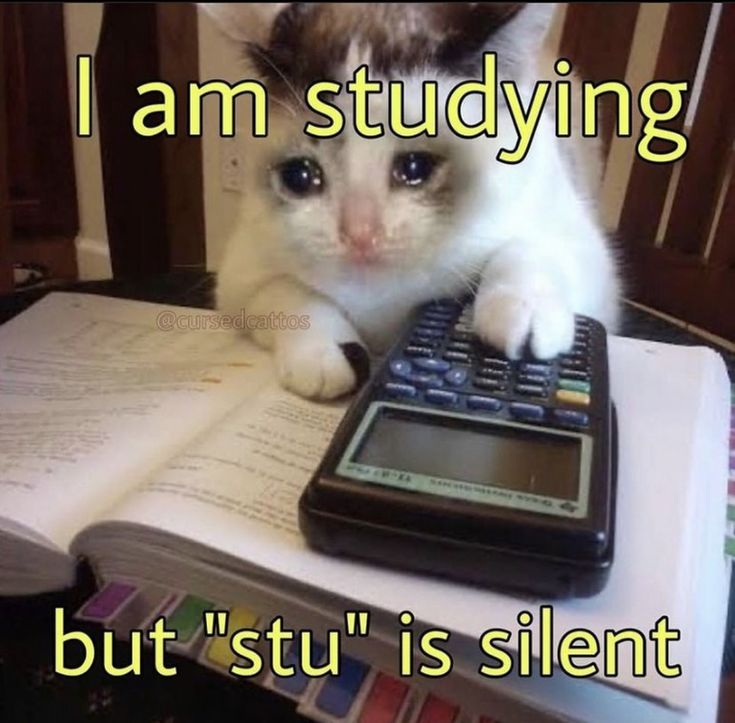

## Нейронные сети в Python

https://www.geeksforgeeks.org/neural-networks-a-beginners-guide/

### Базовые блоки: нейроны

Сначала поговорим о нейронах, основных единицах нейронной сети. Нейрон принимает входные данные, выполняет с ними математические операции и выдает один выход. Вот как выглядит нейрон с двумя входами:

Здесь происходят 3 вещи. Во-первых, каждый вход умножается на вес:

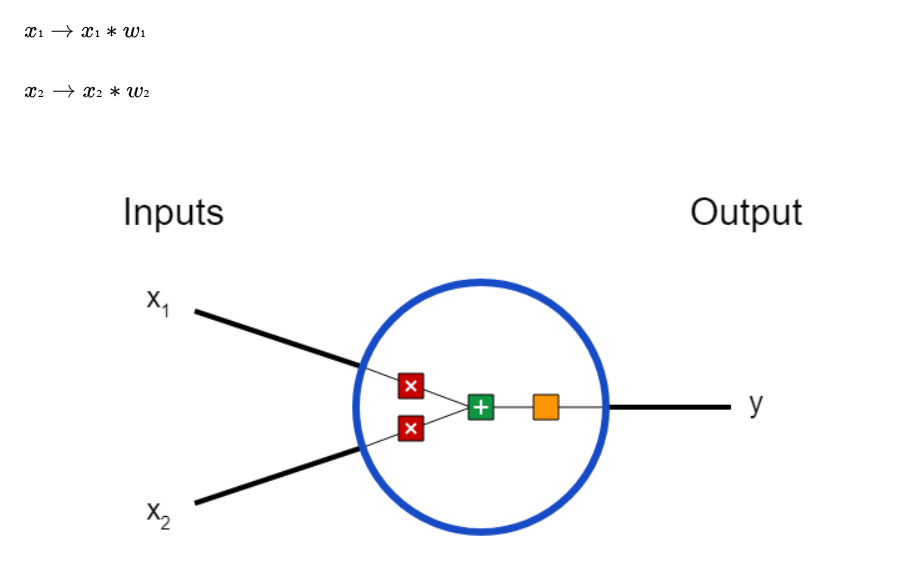

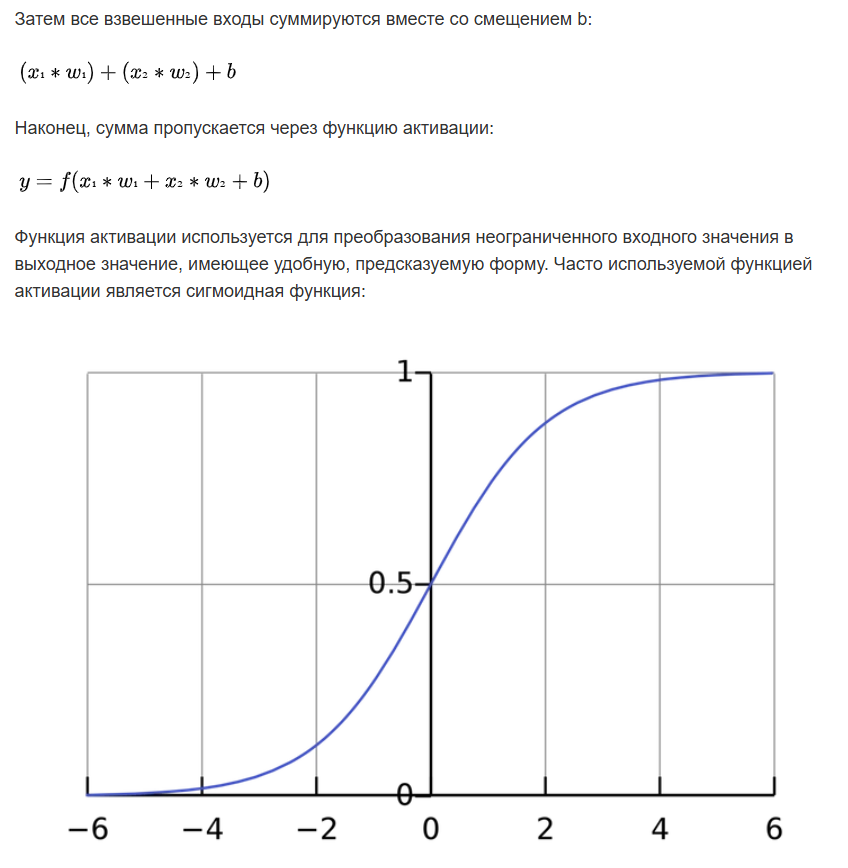

Сигмоидная функция выводит только числа в диапазоне (0, 1). Можно представить, что она сжимает $(−∞, +∞)$ до $(0, 1)$ — большие отрицательные числа становятся ~0, а большие положительные числа становятся ~1.

Простой пример

Предположим, у нас есть нейрон с двумя входами, который использует сигмоидную функцию активации и имеет следующие параметры:

$w = [0, 1]$  
$b = 4$

$w = [0, 1]$ — это просто способ записи $w₁ = 0, w₂ = 1$ в векторной форме. Теперь давайте подадим на вход нейрона $x = [2, 3]$. Мы будем использовать скалярное произведение для более краткой записи:

$(w ⋅ x) + b = ((w₁ * x₁) + (w₂ * x₂)) + b = 0 * 2 + 1 * 3 + 4 = 7$

$y = f(w ⋅ x + b) = f(7) = 0.999$

Нейрон выдает 0.999 при входных данных $x = [2, 3]$. Вот и все! Этот процесс передачи входных данных вперед для получения выходных данных называется прямой связью **(feedforward)**.

### Программирование нейрона

In [1]:
import numpy as np

def sigmoid(x):
    """Наша функция активации: f(x) = 1 / (1 + e^(-x))"""
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        # Взвешиваем входы, добавляем смещение, затем используем функцию активации
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

weights = np.array([0, 1])  # w1 = 0, w2 = 1
bias = 4                    # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])        # x1 = 2, x2 = 3
print(n.feedforward(x))     # 0.9990889488055994

0.9990889488055994


### Объединение нейронов в нейронную сеть

Нейронная сеть — это не что иное, как набор нейронов, соединенных вместе. Вот как может выглядеть простая нейронная сеть:

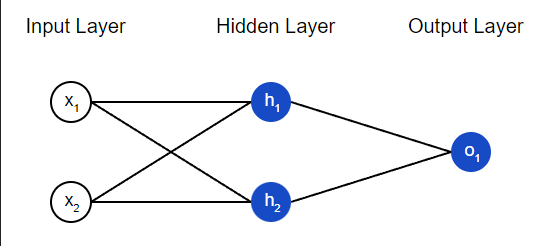

Эта сеть имеет 2 входа, скрытый слой с 2 нейронами (h₁ и h₂) и выходной слой с 1 нейроном (o₁). Обратите внимание, что входами для o₁ являются выходы из h₁ и h₂ — вот что делает ее сетью.

Скрытый слой — это любой слой между входным (первым) слоем и выходным (последним) слоем. Может быть несколько скрытых слоев!

**Пример: Прямая связь**

Давайте использовать изображенную выше сеть и предположим, что все нейроны имеют одинаковые веса $w = [0, 1]$, одинаковое смещение b = 0 и одинаковую сигмоидную функцию активации. Пусть h₁, h₂, o₁ обозначают выходы нейронов, которые они представляют.

Что произойдет, если мы передадим вход $x = [2, 3]$?

$h₁ = h₂ = f(w ⋅ x + b) = f((0 * 2) + (1 * 3) + 0) = f(3) = 0.9526$

$o₁ = f(w ⋅ [h₁, h₂] + b) = f((0 * h₁) + (1 * h₂) + 0) = f(0.9526) = 0.7216$

Выход нейронной сети для входа $x = [2, 3]$ равен $0.7216$. Довольно просто, правда?

Нейронная сеть может иметь любое количество слоев с любым количеством нейронов в этих слоях. Основная идея остается той же: передавать входные данные вперед через нейроны в сети, чтобы получить выходные данные в конце. Для простоты мы продолжим использовать сеть, изображенную выше, для остальной части этого поста.

**Программирование нейронной сети: Прямая связь**

Давайте реализуем прямую связь для нашей нейронной сети. Вот еще раз изображение сети для справки:

In [2]:
import numpy as np

class OurNeuralNetwork:
    '''
    Нейронная сеть с:
    - 2 входами
    - скрытым слоем с 2 нейронами (h1, h2)
    - выходным слоем с 1 нейроном (o1)
    Каждый нейрон имеет одинаковые веса и смещение:
    - w = [0, 1]
    - b = 0
    '''
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0

        # Класс Neuron здесь из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)

        # Входы для o1 - это выходы из h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

        return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))  # 0.7216325609518421

0.7216325609518421


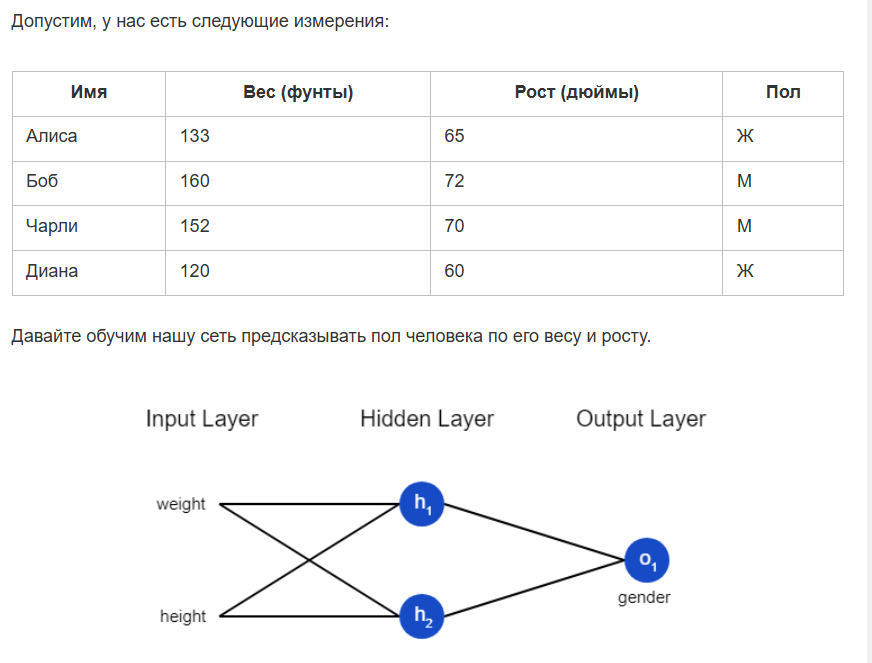

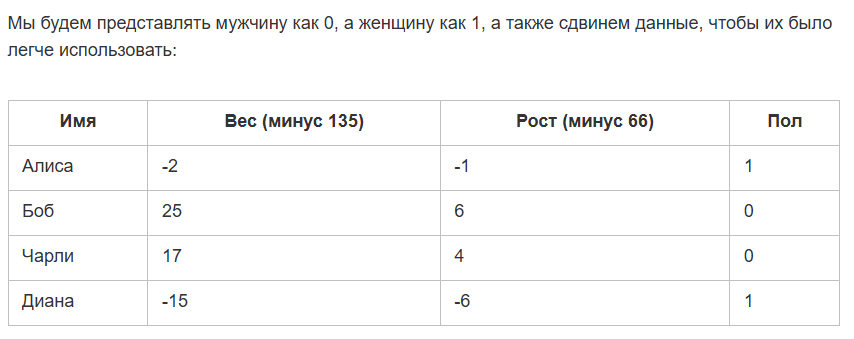

Я произвольно выбрал значения сдвига (135 и 66), чтобы числа выглядели красиво. Обычно сдвиг осуществляется на среднее значение.

### Функция потерь

Прежде чем обучать нашу сеть, нам нужен способ количественно оценить, насколько «хорошо» она работает, чтобы она могла стараться делать «лучше». Это то, что называется функцией потерь.

Мы будем использовать среднеквадратичную ошибку $(MSE)$ в качестве функции потерь:

$MSE = (1/n) * Σ(y_{true} - y_{pred})²$

Давайте разберемся:

* $n$ — количество образцов, которое равно 4 (Алиса, Боб, Чарли, Диана).

* $y$ представляет переменную, которую нужно предсказать, то есть пол.

* $y_{true}$ — истинное значение переменной («правильный ответ»). Например, y_true для Алисы будет 1 (женщина).

* $y_{pred}$ — предсказанное значение переменной. Это то, что выдает наша сеть.

* $(y_{true} - y_{pred})²$ известно как квадратичная ошибка. Наша функция потерь просто берет среднее значение по всем квадратичным ошибкам (отсюда и название среднеквадратичная ошибка). Чем лучше наши предсказания, тем меньше наши потери!

Лучшие предсказания = Меньшие потери.

Обучение сети = попытка минимизировать ее потери.

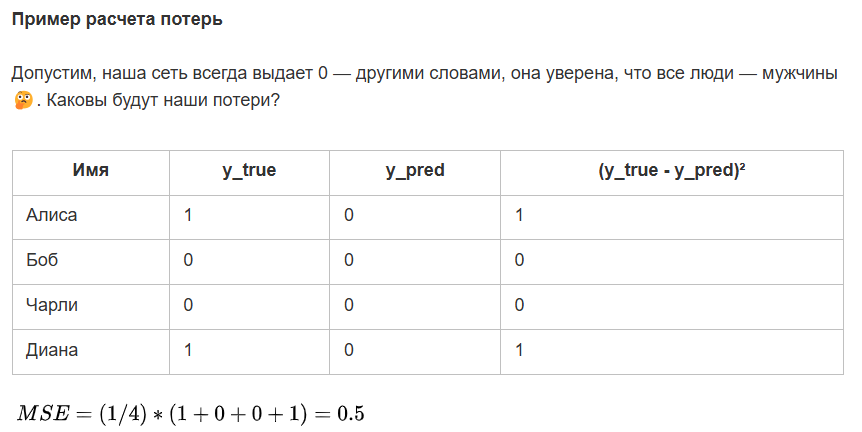

In [3]:
import numpy as np

def mse_loss(y_true, y_pred):
    """y_true и y_pred — массивы NumPy одинаковой длины."""
    return ((y_true - y_pred) ** 2).mean()

y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

print(mse_loss(y_true, y_pred))  # 0.5

0.5


Теперь у нас есть четкая цель: минимизировать потери нейронной сети. Мы знаем, что можем изменять веса и смещения сети, чтобы влиять на ее предсказания, но как сделать это так, чтобы уменьшить потери?

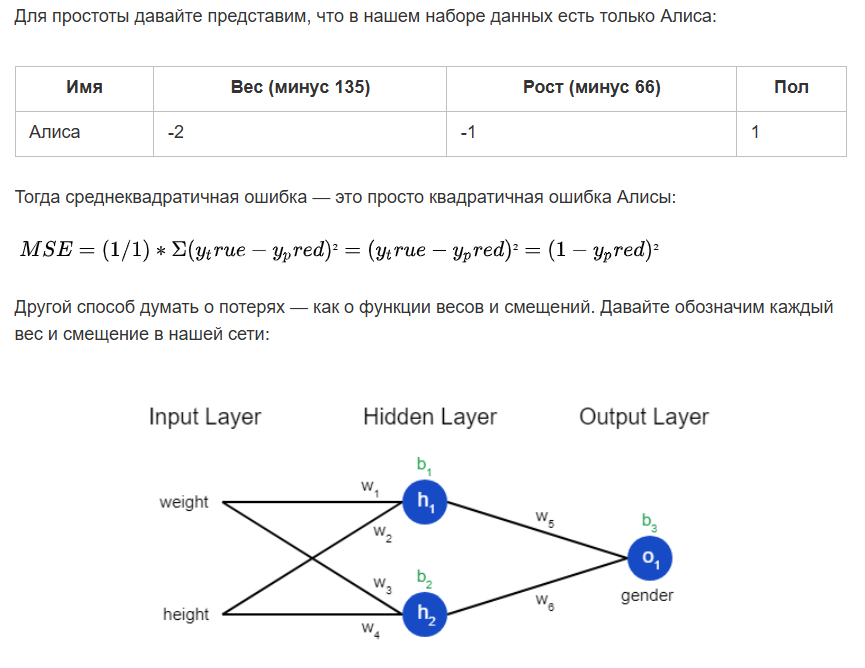

Тогда мы можем записать потери как многомерную функцию:

$L(w₁, w₂, w₃, w₄, w₅, w₆, b₁, b₂, b₃)$

Представьте, что мы хотели бы настроить w₁. Как изменится $L$, если мы изменим $w₁$? На этот вопрос может ответить частная производная $∂L/∂w₁$. Как ее вычислить?

Для начала давайте перепишем частную производную через $∂L/∂y_{pred} * ∂y_{pred}/∂w₁$:

$∂L/∂w₁ = ∂L/∂y_{pred} * ∂y_{pred}/∂w₁$

Это работает благодаря правилу цепочки.
Мы можем вычислить $∂L/∂y_{pred}$, потому что мы вычислили $L = (1 - y_{pred})²$ выше:

$∂L/∂y_{pred}$ = $∂(1 - y_{pred})²/∂y_{pred}$ = $-2(1 - y_{pred})$

Теперь давайте разберемся, что делать с $∂y_{pre}d/∂w₁$. Как и раньше, пусть $h₁, h₂, o₁$ будут выходами нейронов, которые они представляют. Тогда

$y_{pred} = o₁ = f(w₅h₁ + w₆h₂ + b₃)$

$f$ — это сигмоидная функция активации, помните?
Поскольку $w₁$ влияет только на $h₁$ (а не на $h₂$), мы можем написать

$∂y_{pred}/∂w₁ = ∂y_{pred}/∂h₁ * ∂h₁/∂w₁$

$∂y_{pred}/∂h₁ = w₅ * f'(w₅h₁ + w₆h₂ + b₃)$

Еще раз правило цепочки.
Мы делаем то же самое для $∂h₁/∂w₁$:

$h₁ = f(w₁x₁ + w₂x₂ + b₁)$

$∂h₁/∂w₁ = x₁ * f'(w₁x₁ + w₂x₂ + b₁)$

Вы угадали, правило цепочки.
$x₁$ здесь — вес, а $x₂$ — рост. Это второй раз, когда мы видим $f'(x)$ (производную сигмоидной функции)! Давайте выведем ее:

$f(x) = 1 / (1 + e⁻ˣ)$  
$f'(x) = e⁻ˣ / (1 + e⁻ˣ)² = f(x) * (1 - f(x))$

Мы будем использовать эту красивую форму для $f'(x)$ позже.

Мы закончили! Нам удалось разбить $∂L/∂w₁$ на несколько частей, которые мы можем вычислить:

$∂L/∂w₁ = ∂L/∂y_{pred} * ∂y_{pred}/∂h₁ * ∂h₁/∂w₁$

Эта система вычисления частных производных путем обратного распространения ошибки называется **обратным распространением ошибки**, или **«backprop»**.

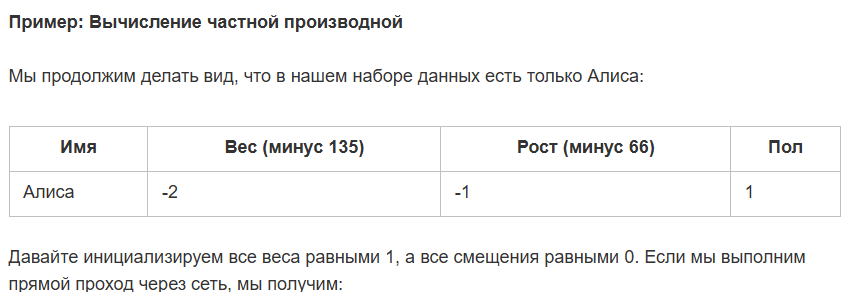

$h₁ = f(w₁x₁ + w₂x₂ + b₁) = f(-2 + -1 + 0) = 0.0474$  

$h₂ = f(w₃x₁ + w₄x₂ + b₂) = 0.0474$  

$o₁ = f(w₅h₁ + w₆h₂ + b₃) = f(0.0474 + 0.0474 + 0) = 0.524$

Сеть выдает $y_{pred} = 0.524$, что не дает сильного предпочтения ни мужчине (0), ни женщине (1). Давайте вычислим $∂L/∂w₁$:

$∂L/∂w₁ = ∂L/∂y_{pred} * ∂y_{pred}/∂h₁ * ∂h₁/∂w₁$

$∂L/∂y_{pred} = -2(1 - y_{pred}) = -2(1 - 0.524) = -0.952$

$∂y_{pred}/∂h₁ = w₅ * f'(w₅h₁ + w₆h₂ + b₃) = 1 * f'(0.0474 + 0.0474 + 0) = f(0.0948) * (1 - f(0.0948)) = 0.249$

$∂h₁/∂w₁ = x₁ * f'(w₁x₁ + w₂x₂ + b₁) = -2 * f'(-2 + -1 + 0) = -2 * f(-3) * (1 - f(-3)) = -0.0904$

$∂L/∂w₁ = -0.952 * 0.249 * -0.0904 = 0.0214$

Напоминание: мы вывели $f'(x) = f(x) * (1 - f(x))$ для нашей сигмоидной функции активации ранее.

Мы сделали это! Это говорит нам о том, что если бы мы увеличили w₁, L немного увеличился бы в результате.

### Обучение: Стохастический градиентный спуск

Теперь у нас есть все инструменты, необходимые для обучения нейронной сети! Мы будем использовать алгоритм оптимизации, называемый стохастическим градиентным спуском (SGD), который говорит нам, как изменять наши веса и смещения, чтобы минимизировать потери. Это, по сути, просто уравнение обновления:

$w₁ ← w₁ - η * ∂L/∂w₁$

$η$ — это константа, называемая скоростью обучения, которая контролирует, насколько быстро мы обучаемся. Все, что мы делаем, это вычитаем $η * ∂L/∂w₁$ из $w₁$:

* Если $∂L/∂w₁$ положительно, $w₁$ уменьшится, что приведет к уменьшению $L$.

* Если $∂L/∂w₁$ отрицательно, $w₁$ увеличится, что приведет к уменьшению $L$.

Если мы сделаем это для каждого веса и смещения в сети, потери будут медленно уменьшаться, и наша сеть будет улучшаться.

Наш процесс обучения будет выглядеть так:

- Выберите один образец из нашего набора данных. Это то, что делает его стохастическим градиентным спуском — мы работаем только с одним образцом за раз.

- Вычислите все частные производные потерь по отношению к весам или смещениям (например, $∂L/∂w₁$, $∂L/∂w₂$ и т.д.).

- Используйте уравнение обновления, чтобы обновить каждый вес и смещение.

- Вернитесь к шагу 1.

Давайте посмотрим на это в действии!

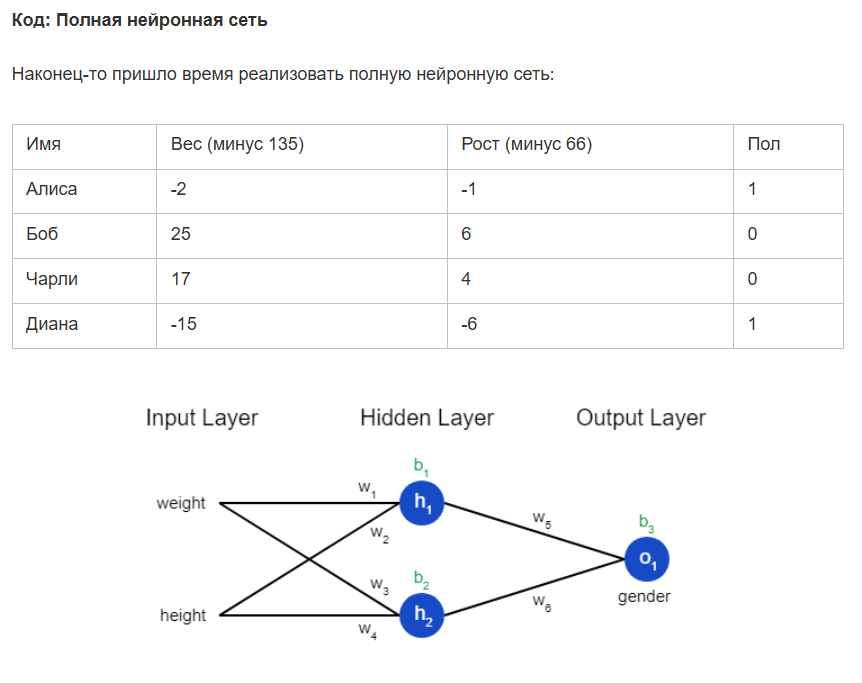

In [4]:
import numpy as np

def sigmoid(x):
    """Сигмоидная функция активации: f(x) = 1 / (1 + e^(-x))"""
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
    """Производная сигмоиды: f'(x) = f(x) * (1 - f(x))"""
    fx = sigmoid(x)
    return fx * (1 - fx)

def mse_loss(y_true, y_pred):
    """y_true и y_pred — массивы NumPy одинаковой длины."""
    return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
    """
    Нейронная сеть с:
    - 2 входами
    - скрытым слоем с 2 нейронами (h1, h2)
    - выходным слоем с 1 нейроном (o1)

    *** ОТКАЗ ОТ ОТВЕТСТВЕННОСТИ ***:
    Код ниже предназначен для простоты и обучения, а НЕ для оптимальности.
    Реальный код нейронной сети совсем не похож на этот. НЕ используйте этот код.
    Вместо этого прочитайте/запустите его, чтобы понять, как работает эта конкретная сеть.
    """
    def __init__(self):
        # Веса
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()

        # Смещения
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

    def feedforward(self, x):
        # x — массив NumPy с 2 элементами.
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1

    def train(self, data, all_y_trues):
        """
        - data — массив NumPy (n x 2), n = количество образцов в наборе данных.
        - all_y_trues — массив NumPy с n элементами.
          Элементы в all_y_trues соответствуют элементам в data.
        """
        learn_rate = 0.1
        epochs = 1000  # количество проходов по всему набору данных

        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                # --- Выполняем прямой проход (эти значения понадобятся нам позже)
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)

                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)

                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                # --- Вычисляем частные производные.
                # --- Обозначения: d_L_d_w1 означает "частная производная L по w1"
                d_L_d_ypred = -2 * (y_true - y_pred)

                # Нейрон o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)

                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

                # Нейрон h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)

                # Нейрон h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)

                # --- Обновляем веса и смещения
                # Нейрон h1
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

                # Нейрон h2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

                # Нейрон o1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

            # --- Вычисляем общие потери в конце каждой эпохи
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(all_y_trues, y_preds)
                print("Эпоха %d потери: %.3f" % (epoch, loss))


# Определяем набор данных
data = np.array([
    [-2, -1],  # Алиса
    [25, 6],   # Боб
    [17, 4],   # Чарли
    [-15, -6], # Диана
])
all_y_trues = np.array([
    1, # Алиса
    0, # Боб
    0, # Чарли
    1, # Диана
])

# Обучаем нашу нейронную сеть!
network = OurNeuralNetwork()
network.train(data, all_y_trues)


# Делаем несколько предсказаний
emily = np.array([-7, -3])  # 128 фунтов, 63 дюйма
frank = np.array([20, 2])   # 155 фунтов, 68 дюймов
print("Эмили: %.3f" % network.feedforward(emily)) # 0.951 - Ж
print("Фрэнк: %.3f" % network.feedforward(frank)) # 0.039 - М

Эпоха 0 потери: 0.396
Эпоха 10 потери: 0.274
Эпоха 20 потери: 0.187
Эпоха 30 потери: 0.133
Эпоха 40 потери: 0.099
Эпоха 50 потери: 0.077
Эпоха 60 потери: 0.062
Эпоха 70 потери: 0.051
Эпоха 80 потери: 0.042
Эпоха 90 потери: 0.036
Эпоха 100 потери: 0.031
Эпоха 110 потери: 0.027
Эпоха 120 потери: 0.024
Эпоха 130 потери: 0.021
Эпоха 140 потери: 0.019
Эпоха 150 потери: 0.017
Эпоха 160 потери: 0.016
Эпоха 170 потери: 0.015
Эпоха 180 потери: 0.013
Эпоха 190 потери: 0.012
Эпоха 200 потери: 0.012
Эпоха 210 потери: 0.011
Эпоха 220 потери: 0.010
Эпоха 230 потери: 0.010
Эпоха 240 потери: 0.009
Эпоха 250 потери: 0.008
Эпоха 260 потери: 0.008
Эпоха 270 потери: 0.008
Эпоха 280 потери: 0.007
Эпоха 290 потери: 0.007
Эпоха 300 потери: 0.007
Эпоха 310 потери: 0.006
Эпоха 320 потери: 0.006
Эпоха 330 потери: 0.006
Эпоха 340 потери: 0.006
Эпоха 350 потери: 0.005
Эпоха 360 потери: 0.005
Эпоха 370 потери: 0.005
Эпоха 380 потери: 0.005
Эпоха 390 потери: 0.005
Эпоха 400 потери: 0.005
Эпоха 410 потери: 0.004
Эпо

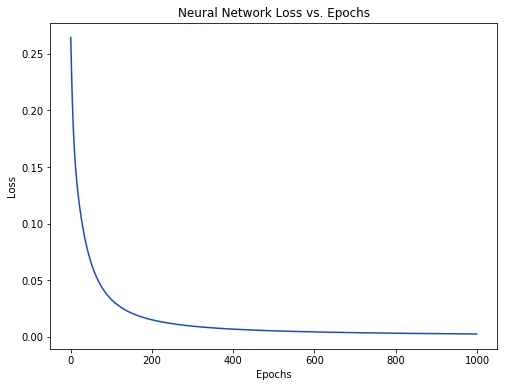

https://www.geeksforgeeks.org/neural-networks-a-beginners-guide/

## Feedforward Neural Network (Нейронная сеть с прямой связью)


Нейронная сеть с прямой связью (FNN) — это тип искусственной нейронной сети, в которой информация течет в одном направлении — от входного слоя через скрытые слои к выходному слою — без циклов или обратной связи. В основном он используется для задач распознавания образов, таких как классификация изображений и речи.  

Структура нейронной сети с прямой связью
Нейронные сети с прямой связью имеют структурированную многоуровневую структуру, в которой данные последовательно проходят через каждый слой.

* **Входной слой**: Входной слой состоит из нейронов, которые получают входные данные. Каждый нейрон во входном слое представляет собой признак входных данных.

* **Скрытые слои**: Один или несколько скрытых слоев размещаются между входным и выходным слоями. Эти слои отвечают за изучение сложных закономерностей в данных. Каждый нейрон в скрытом слое применяет взвешенную сумму входных данных, за которой следует нелинейная функция активации.

* **Выходной слой**: Выходной слой обеспечивает окончательный вывод сети. Количество нейронов в этом слое соответствует количеству классов в задаче классификации или количеству выходов в задаче регрессии.

Каждая связь между нейронами в этих слоях имеет связанный с этим вес, который корректируется в процессе обучения, чтобы свести к минимуму ошибку в предсказаниях.

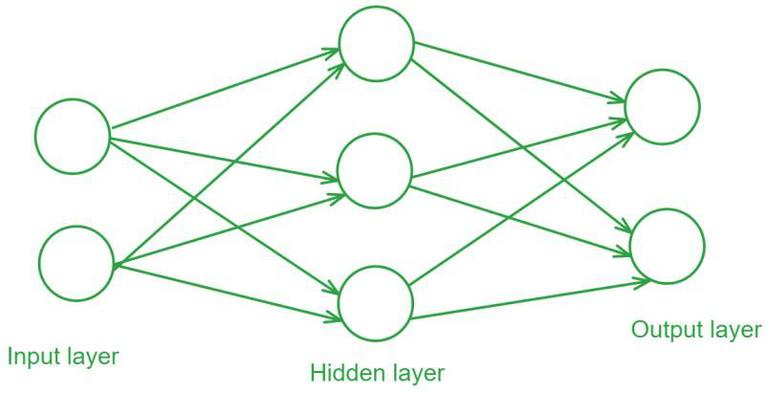

### Функции активации
Функции активации вносят нелинейность в сеть, позволяя ей обучаться и моделировать сложные шаблоны данных.

К распространенным функциям активации относятся:



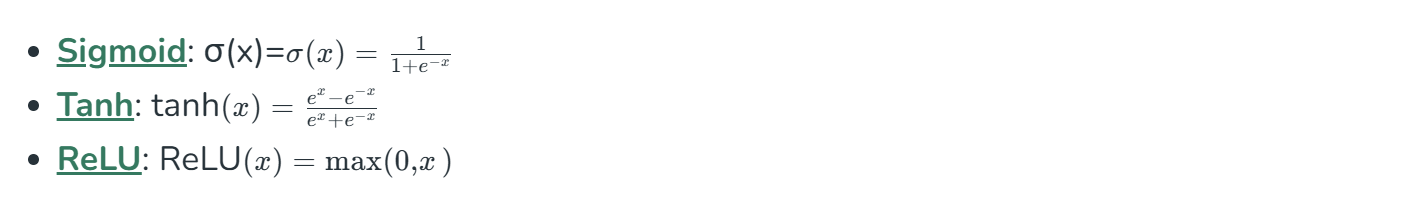

### Обучение нейронной сети с прямой связью
Обучение нейронной сети с прямой связью включает в себя регулировку весов нейронов, чтобы свести к минимуму ошибку между прогнозируемым и фактическим выходом. Этот процесс обычно выполняется с использованием обратного распространения и градиентного спуска.

* **Прямое распространение**: Во время прямого распространения входные данные проходят через сеть, и выходные данные вычисляются.

* **Вычисление потерь**: Потери (или ошибки) вычисляются с помощью функции потерь, такой как Среднеквадратичная ошибка (MSE) для задач регрессии или Кросс-энтропийная потеря для задач классификации.

* **Обратное распространение**: При обратном распространении ошибка распространяется обратно по сети для обновления весов. Градиент функции потерь по отношению к каждому весу вычисляется, и веса корректируются с помощью градиентного спуска.

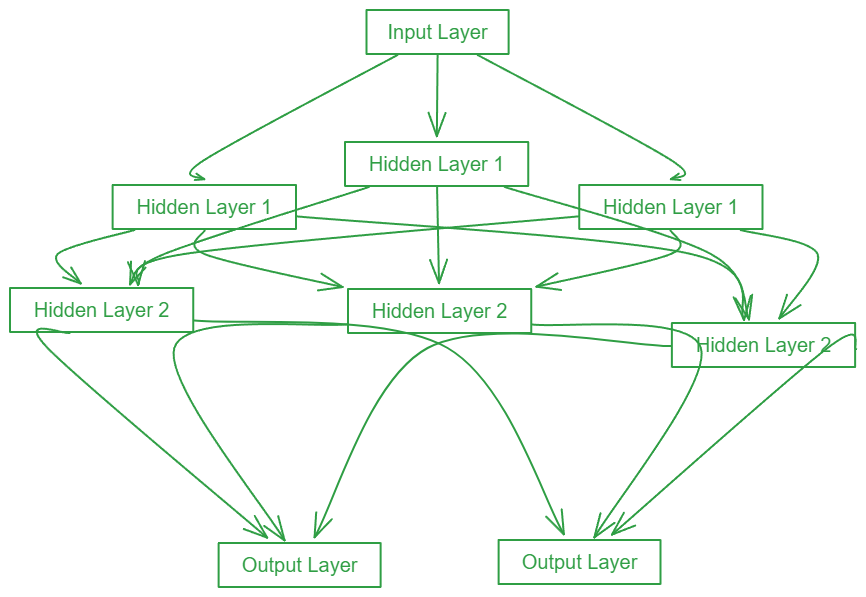

### Оценка нейронной сети с прямой связью
Оценка производительности обученной модели включает в себя несколько показателей:

* Accuracy: доля правильно классифицированных экземпляров от общего числа экземпляров.

* Precision: отношение истинно положительных прогнозов к общему количеству прогнозируемых положительных результатов.
Напомним: Отношение истинно положительных прогнозов к фактическим положительным.

* F1 Score: гармоническое среднее значение точности и запоминаемости, обеспечивающее баланс между ними.

* Матрица несоответствий: таблица, используемая для описания производительности модели классификации, показывающая истинно положительные, истинно отрицательные, ложноположительные и ложноотрицательные результаты.

### Реализация кода нейронной сети Feedforward
Этот код демонстрирует процесс создания, обучения и оценки модели нейронной сети с использованием TensorFlow и Keras для классификации рукописных цифр из набора данных MNIST.

Архитектура модели определяется с помощью Sequential API, состоящего из:

* слой Flatten для преобразования входного 2D-изображения в 1D-массив

* Плотный слой со 128 нейронами и активацией ReLU

* последний слой Dense с 10 нейронами и активацией softmax для вывода вероятностей для каждого класса цифр.

Модель компилируется с помощью оптимизатора Адама, функции потерь SparseCategoricalCrossentropy и метрики SparseCategoricalAccuracy, а затем обучается в течение 5 эпох на обучающих данных.

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Load and prepare the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.4342 - sparse_categorical_accuracy: 0.8734
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1178 - sparse_categorical_accuracy: 0.9653
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0728 - sparse_categorical_accuracy: 0.9781
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0549 - sparse_categorical_accuracy: 0.9831
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0424 - sparse_categorical_accuracy: 0.9873
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0896 - sparse_categorical_accuracy: 0.9739

Test accuracy: 0.977400004863739


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.7656 - loss: 0.7680 - val_accuracy: 0.9758 - val_loss: 0.0860
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.9635 - loss: 0.1231 - val_accuracy: 0.9843 - val_loss: 0.0583
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.9728 - loss: 0.0869 - val_accuracy: 0.9867 - val_loss: 0.0493
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 93ms/step - accuracy: 0.9784 - loss: 0.0703 - val_accuracy: 0.9897 - val_loss: 0.0399
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 95ms/step - accuracy: 0.9806 - loss: 0.0613 - val_accuracy: 0.9898 - val_loss: 0.0395

Оценка на тестовых данных:
313/313 - 2s - 7ms/step - accuracy: 0.9878 - loss: 0.0353
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1

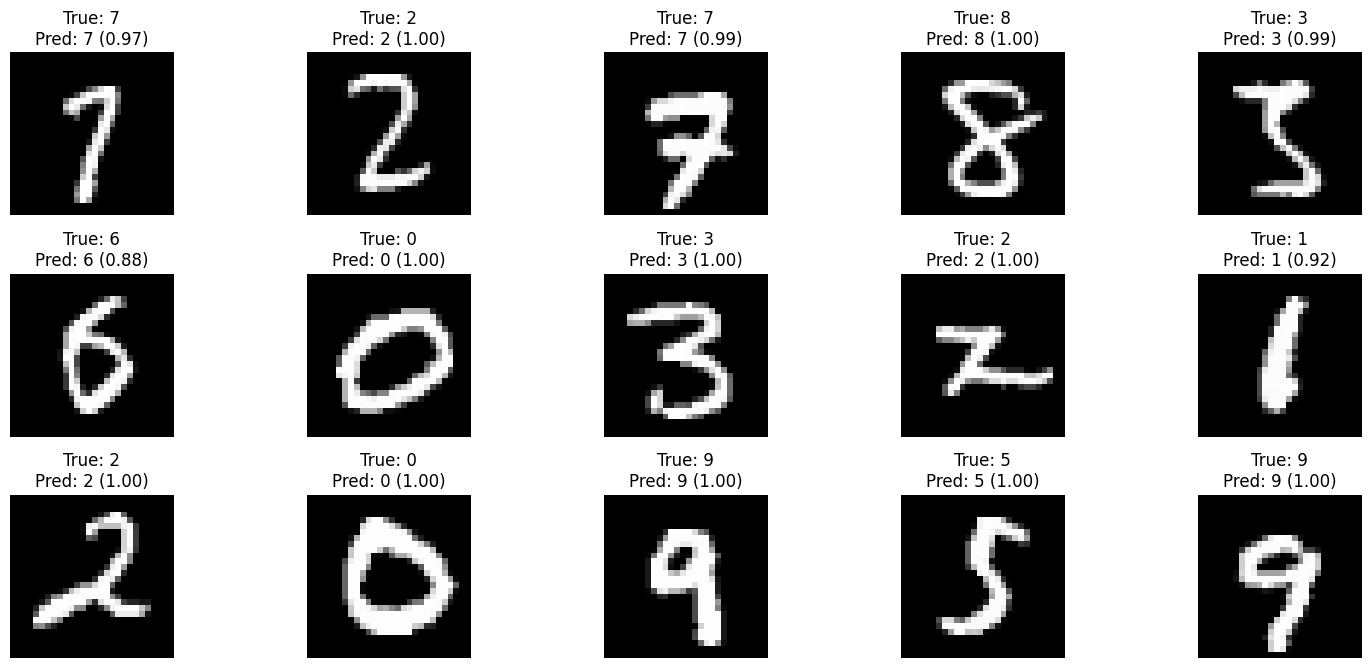

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# 1. Загрузка и подготовка данных
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Нормализация и добавление канала (для CNN)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)  # (60000, 28, 28) -> (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)

# 2. Построение модели CNN
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 3. Обучение модели
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

# 4. Визуализация случайных примеров с предсказаниями
def plot_predictions(n_examples=10):
    plt.figure(figsize=(15, 3 * (n_examples // 5)))
    indices = np.random.choice(len(x_test), size=n_examples, replace=False)

    for i, idx in enumerate(indices):
        img = x_test[idx]
        true_label = y_test[idx]

        # Предсказание модели
        pred = model.predict(img[np.newaxis, ...])[0]
        pred_label = np.argmax(pred)
        confidence = np.max(pred)

        # Отрисовка
        plt.subplot((n_examples // 5) + 1, 5, i + 1)
        plt.imshow(img.squeeze(), cmap="gray")
        plt.title(f"True: {true_label}\nPred: {pred_label} ({confidence:.2f})")
        plt.axis("off")

    plt.tight_layout()
    plt.savefig("mnist_predictions.png")  # Сохранение в файл
    plt.show()

# Вывод результатов
print("\nОценка на тестовых данных:")
model.evaluate(x_test, y_test, verbose=2)

plot_predictions(15)  # Визуализация 15 случайных цифр

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


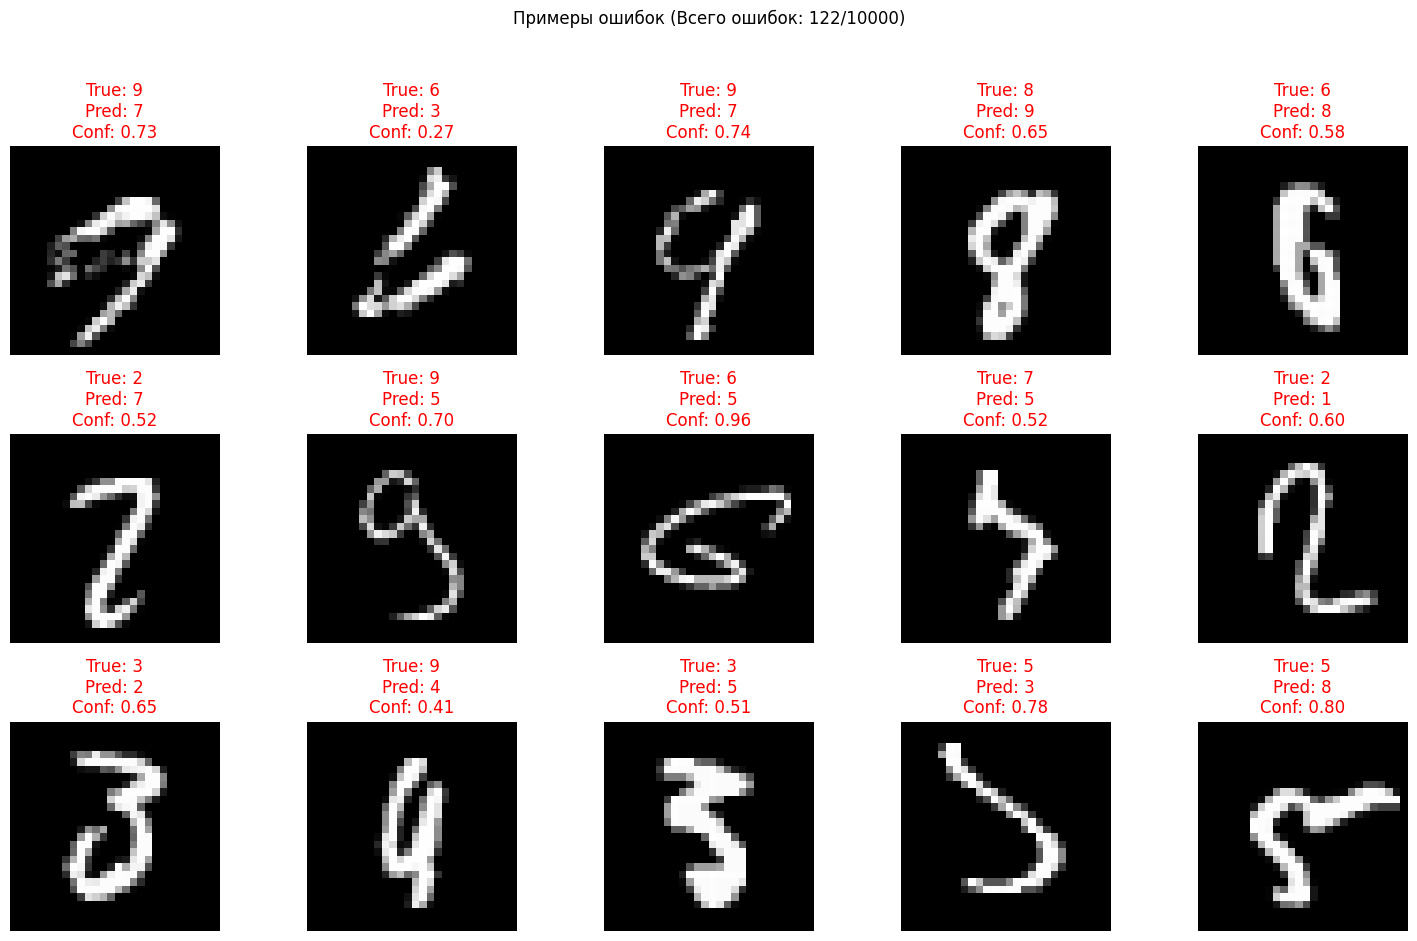


Ошибок распознавания: 122 из 10000 (1.22%)


In [9]:
def plot_errors(n_errors=15):
    # Получаем все предсказания
    y_pred = model.predict(x_test)
    y_pred_labels = np.argmax(y_pred, axis=1)

    # Находим индексы ошибочных предсказаний
    error_indices = np.where(y_pred_labels != y_test)[0]

    # Случайно выбираем N ошибок
    selected_errors = np.random.choice(error_indices, size=min(n_errors, len(error_indices)), replace=False)

    # Визуализация
    plt.figure(figsize=(15, 3 * (n_errors // 5 + 1)))
    for i, idx in enumerate(selected_errors):
        img = x_test[idx]
        true_label = y_test[idx]
        pred_label = y_pred_labels[idx]
        confidence = np.max(y_pred[idx])

        plt.subplot((n_errors // 5) + 1, 5, i + 1)
        plt.imshow(img.squeeze(), cmap="gray")
        plt.title(f"True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}", color='red')
        plt.axis("off")

    plt.suptitle(f"Примеры ошибок (Всего ошибок: {len(error_indices)}/{len(x_test)})", y=1.02)
    plt.tight_layout()
    plt.savefig("mnist_errors.png", bbox_inches='tight')
    plt.show()

    # Выводим статистику
    error_rate = len(error_indices) / len(x_test)
    print(f"\nОшибок распознавания: {len(error_indices)} из {len(x_test)} ({error_rate:.2%})")
plot_errors()

## Single Layer Perceptron (Однослойный персептрон)

Однослойный персептрон вдохновлен биологическими нейронами и их способностью обрабатывать информацию. Чтобы понять SLP, нам сначала нужно разобрать работу одного искусственного нейрона, который является фундаментальным строительным блоком нейронных сетей. Искусственный нейрон — это упрощенная вычислительная модель, которая имитирует поведение биологического нейрона. Он принимает входные данные, обрабатывает их и выдает выход. Вот как это работает шаг за шагом:

* Прием сигнала извне.

* Обрабатываем сигнал и решаем, нужно ли нам отправлять информацию или нет.

* Передайте сигнал целевой клетке, которой может быть другой нейрон.

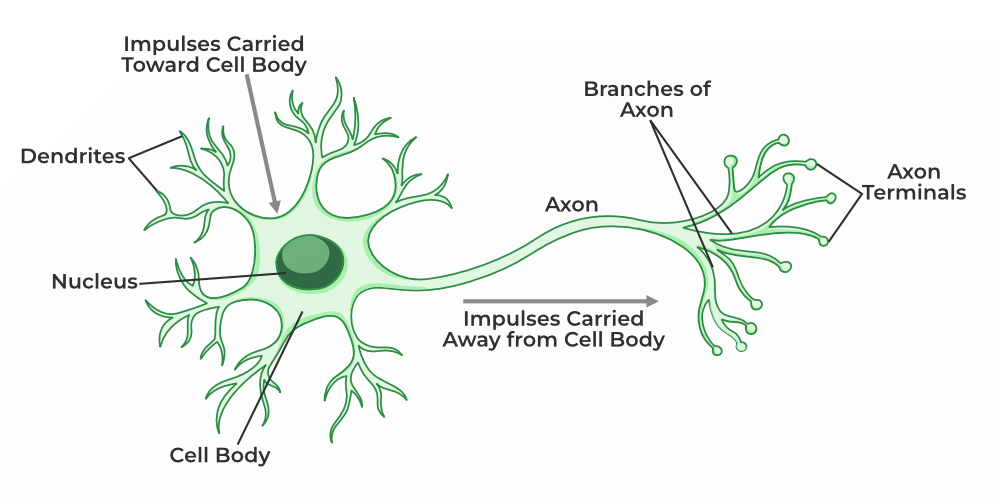

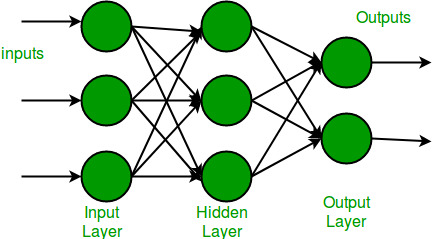

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [11]:
(x_train, y_train),\
    (x_test, y_test) = keras.datasets.mnist.load_data()


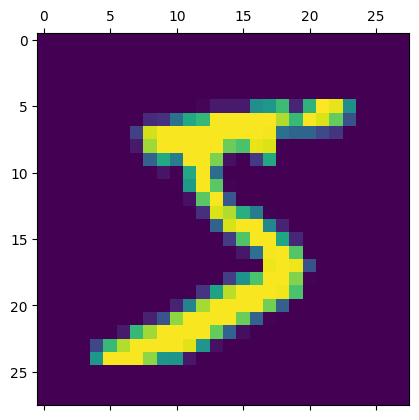

In [12]:
len(x_train)
len(x_test)
x_train[0].shape
plt.matshow(x_train[0])


In [13]:
x_train = x_train/255
x_test = x_test/255

# Flatting the dataset in order
# to compute for model building
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)


In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),
                       activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8055 - loss: 0.7344
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9124 - loss: 0.3142
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9198 - loss: 0.2889
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9229 - loss: 0.2764
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9256 - loss: 0.2627


In [15]:
model.evaluate(x_test_flatten, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9149 - loss: 0.3009


[0.26561450958251953, 0.9251000285148621]

Даже с такой простой моделью мы добились точности более 92%. Это довольно впечатляюще для нейронной сети, состоящей всего из одного слоя. Однако для достижения еще лучших результатов мы могли бы добавить скрытые слои или использовать более сложные архитектуры, такие как СНС (сверточные нейронные сети).

## Multi-Layer Perceptron (Многослойный персептрон)  

**Многослойный персептрон (MLP)** — это искусственная нейронная сеть, широко используемая для решения задач классификации и регрессии.

MLP состоит из полностью связанных плотных слоев, которые преобразуют входные данные из одного измерения в другое. Он называется «многослойным», потому что содержит входной слой, один или несколько скрытых слоев и выходной слой. Цель MLP — моделировать сложные отношения между входами и выходами, что делает его мощным инструментом для различных задач машинного обучения.

* **Входной слой**: Каждый нейрон (или узел) в этом слое соответствует входному признаку. Например, если у вас есть три входных объекта, входной слой будет иметь три нейрона.

* **Скрытые слои**: MLP может иметь любое количество скрытых слоев, каждый из которых содержит любое количество узлов. Эти слои обрабатывают информацию, полученную от входного слоя.

* **Выходной слой**: Выходной слой генерирует окончательный прогноз или результат. Если выходов несколько, то выходной слой будет иметь соответствующее количество нейронов.
Каждая связь на диаграмме является представлением полностью связанной природы MLP. Это означает, что каждый узел в одном слое соединяется с каждым узлом в следующем слое. По мере того, как данные перемещаются по сети, каждый слой преобразует их до тех пор, пока в выходном слое не будет сгенерирован окончательный результат.

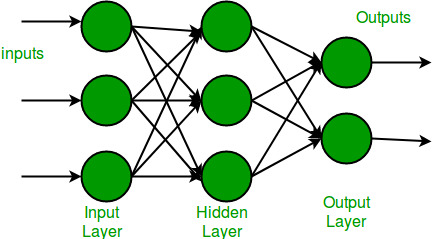

In [16]:
# Importing necessary modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [17]:
# Normalize image pixel values by dividing by 255 (grayscale)
gray_scale = 255

x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

# Checking the shape of feature and target matrices
print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)


Feature matrix (x_train): (60000, 28, 28)
Target matrix (y_train): (60000,)
Feature matrix (x_test): (10000, 28, 28)
Target matrix (y_test): (10000,)


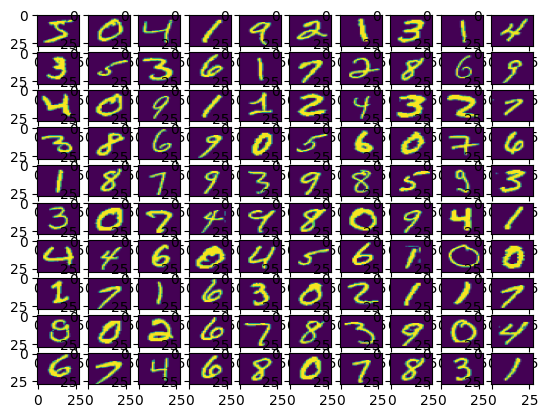

In [18]:
# Visualizing 100 images from the training data
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        k += 1
plt.show()


In [19]:
# Building the Sequential neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax'),
])


In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [21]:
model.fit(x_train, y_train, epochs=10,
          batch_size=2000,
          validation_split=0.2)


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.2736 - loss: 2.2603 - val_accuracy: 0.6541 - val_loss: 1.7667
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.6907 - loss: 1.5933 - val_accuracy: 0.7981 - val_loss: 1.0856
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7987 - loss: 0.9971 - val_accuracy: 0.8586 - val_loss: 0.7106
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8527 - loss: 0.6854 - val_accuracy: 0.8823 - val_loss: 0.5271
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.8767 - loss: 0.5247 - val_accuracy: 0.8976 - val_loss: 0.4300
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8934 - loss: 0.4314 - val_accuracy: 0.9047 - val_loss: 0.3723
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9044 - loss: 0.3719 - val_accuracy: 0.9132 - val_loss: 0.3341
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.9085 - loss: 0.3412 - val_accuracy: 0.9177 - v

In [22]:
# Evaluating the model on test data
results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results)


Test loss, Test accuracy: [0.2768893241882324, 0.9225000143051147]


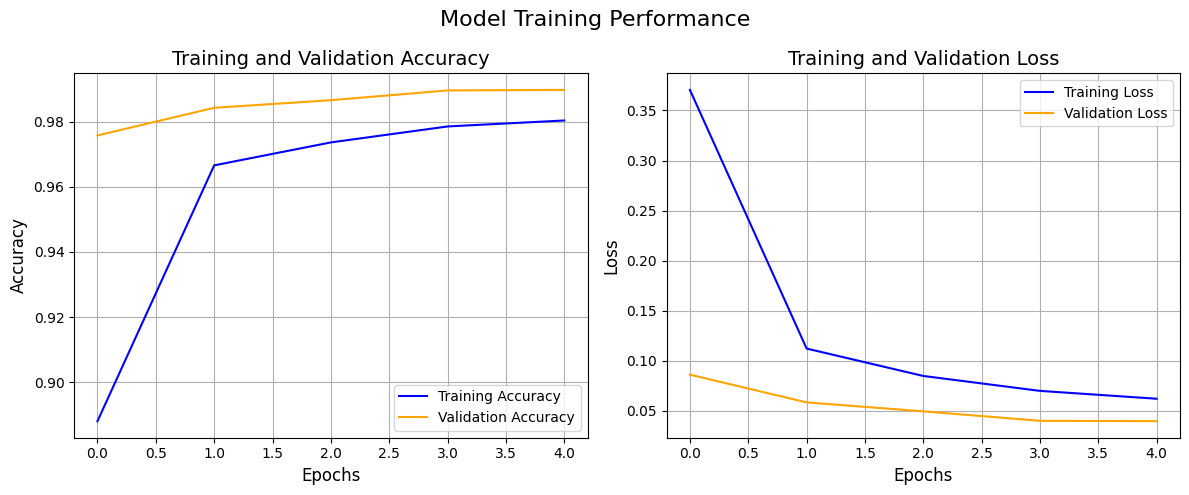

In [23]:
# Visualization of Training and Validation Accuracy/Loss
plt.figure(figsize=(12, 5))

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()

Модель эффективно обучается на обучающем наборе, но точность проверки и потери выравниваются, что может указывать на то, что модель начинает переобучаться (когда она хорошо работает на обучающих данных, но не так хорошо работает на невидимых данных).

**Преимущества многослойного персептрона**
* **Универсальность**: MLP могут применяться к различным задачам, как классификациям, так и регрессионным.

* **Нелинейность**: Благодаря функциям активации MLP могут моделировать сложные, нелинейные отношения в данных.

* **Параллельные вычисления**: С помощью графических процессоров MLP можно быстро обучать, используя преимущества параллельных вычислений.


**Недостатки многослойного персептрона**
* **Ресурсоемкие вычислительные ресурсы**: MLP могут обучаться медленно, особенно на больших наборах данных с большим количеством слоев.

* **Склонность к переобучению**: Без надлежащих методов регуляризации MLP могут переобучать обучающие данные, что приведет к плохому обобщению.

* **Чувствительность к масштабированию данных**: MLP требуют правильно нормализованных или масштабированных данных для оптимальной производительности.

Многослойный персептрон обладает способностью обучаться сложным шаблонам на основе данных, что делает его ценным инструментом в машинном обучении. Независимо от того, работаете ли вы со структурированными данными, изображениями или текстом, понимание того, как работает MLP, может открыть двери для решения широкого круга проблем.

## Оптимизаторы (Optimizers) в нейронных сетях

1) **SGD (Stochastic Gradient Descent)**
* Базовая версия градиентного спуска.

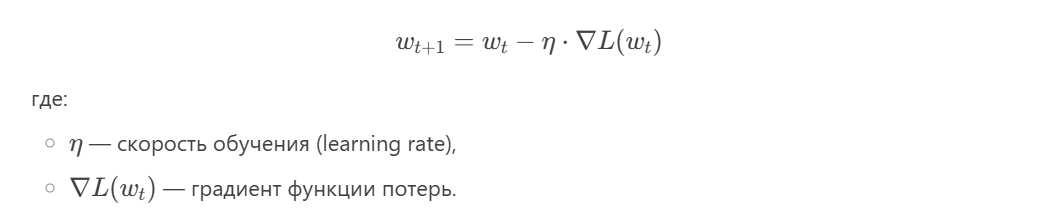

In [24]:
optimizer = keras.optimizers.SGD(learning_rate=0.01)

Плюсы:

* Простота.

* Хорошо работает для простых задач.

Минусы:

* Медленная сходимость.

* Застревает в локальных минимумах.

2) **SGD с импульсом (Momentum)**
* Улучшенная версия SGD, которая учитывает историю градиентов.

Формула:

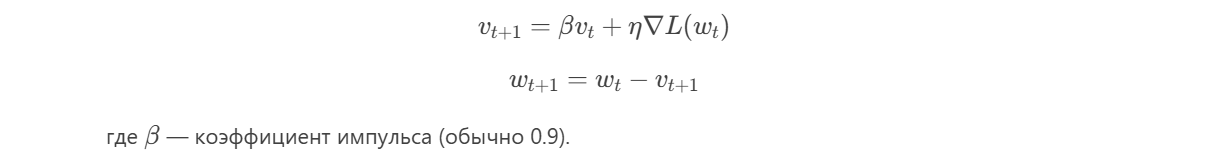

Плюсы:

* Ускоряет обучение.

* Помогает избегать локальных минимумов.

3) **RMSprop**
* Адаптивный метод, который автоматически настраивает learning rate для каждого параметра.

Формула:

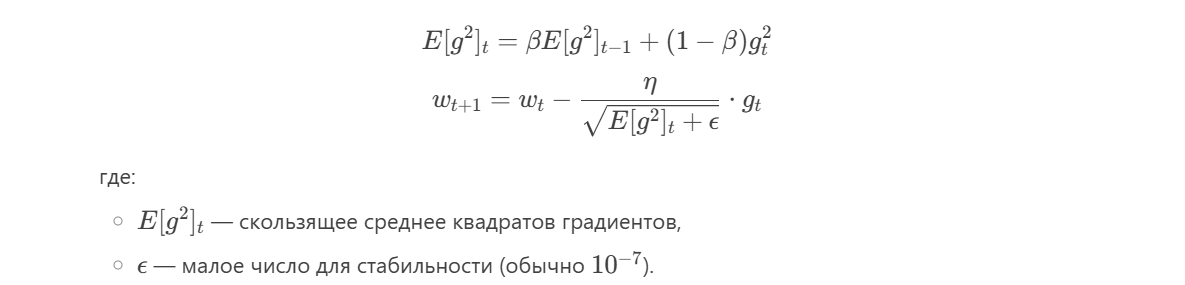

Плюсы:

* Работает лучше, чем SGD, для сложных задач.

* Хорош для рекуррентных сетей (RNN).

4) **Adam (Adaptive Moment Estimation)**
* Самый популярный оптимизатор (по умолчанию во многих моделях).

* Комбинирует идеи Momentum и RMSprop.

Формула:

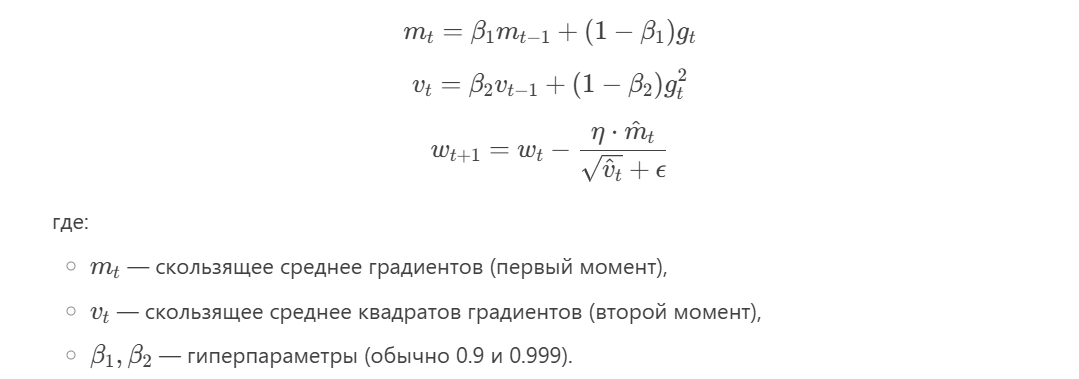

Плюсы:

* Быстрая сходимость.

* Хорошо работает для большинства задач (CNN, RNN, GAN).

Минусы:

* Может "проскакивать" глобальный минимум.

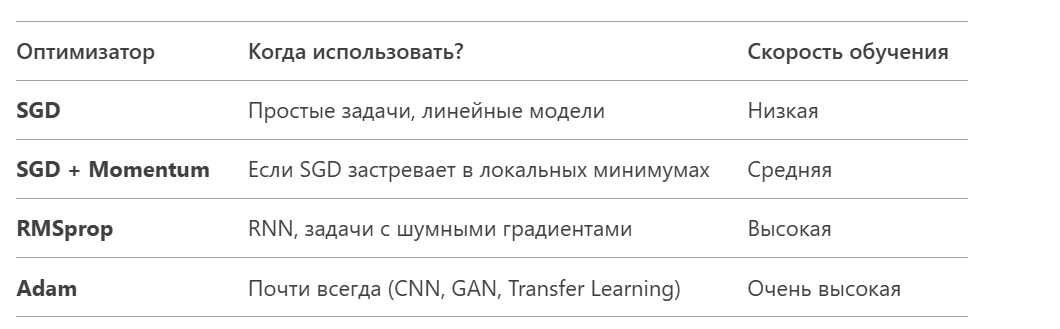

## Convolution Neural Network (Сверточная нейронная сеть (СНС))  

**Сверточная нейронная сеть (СНС)** — это усовершенствованная версия искусственных нейронных сетей (ИНС), предназначенная в первую очередь для извлечения признаков из наборов матриц, похожих на сетку. Это особенно полезно для визуальных наборов данных, таких как изображения или видео, где шаблоны данных играют решающую роль. СНС широко используются в приложениях компьютерного зрения благодаря своей эффективности при обработке визуальных данных.

СНС состоят из нескольких слоев, таких как входной слой, сверточный слой, объединяющий слой и полностью связные слои. Давайте узнаем больше о CNN подробнее.

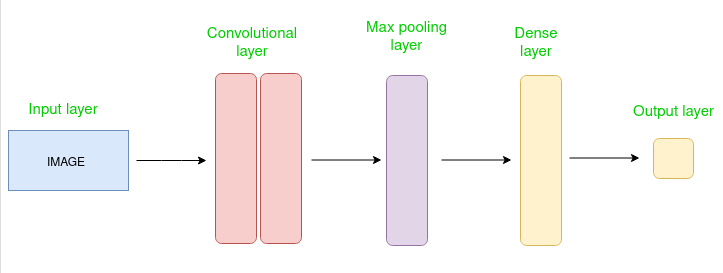

### Как работают сверточные слои?
Сверточные нейронные сети — это нейронные сети, которые имеют общие параметры.

Представьте, что у вас есть изображение. Он может быть представлен в виде кубоида, имеющего длину, ширину (размер изображения) и высоту (т.е. канал, поскольку изображения обычно имеют красный, зеленый и синий каналы).

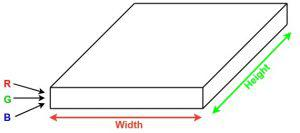

Теперь представьте, что вы берете небольшой участок этого изображения и запускаете на нем маленькую нейронную сеть, называемую фильтром или ядром, скажем, с K выходами и представляя их вертикально.

Теперь проведите этой нейронной сетью по всему изображению, в результате мы получим еще одно изображение с другой шириной, высотой и глубиной. Вместо каналов R, G и B теперь у нас больше каналов, но меньше ширина и высота. Эта операция называется сверткой. Если размер патча такой же, как у изображения, то это будет обычная нейронная сеть. Из-за этого маленького пятна у нас меньше веса.

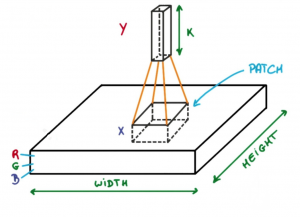

### **Математический обзор свертки**
Теперь давайте поговорим о математике, которая участвует во всем процессе свертки.

* Слои свертки состоят из набора обучаемых фильтров (или ядер), имеющих малую ширину и высоту и ту же глубину, что и входной объем (3, если входной слой является входным изображением).

* Например, если нам нужно запустить свертку на изображении размером 34х34х3. Возможный размер фильтров может быть axax3, где «a» может быть любым размером 3, 5 или 7, но меньше по сравнению с размером изображения.

* Во время прямого прохода мы шаг за шагом перемещаем каждый фильтр по всему входному объему, где каждый шаг называется шагом (который может иметь значение 2, 3 или даже 4 для изображений большой размерности) и вычисляем скалярное произведение между весами ядра и патчем из входного объема.

* Когда мы перемещаем наши фильтры, мы получаем двухмерный выход для каждого фильтра, и в результате мы складываем их вместе, мы получаем выходной объем, глубину которого равна количеству фильтров. Сеть изучит все фильтры.


### **Слои, используемые для построения ConvNet**
Полная архитектура сверточных нейронных сетей также известна как covnets. Ковнеты — это последовательность слоев, и каждый слой преобразует один объем в другой с помощью дифференцируемой функции.

Возьмем пример, запустив covnets изображение размера 32 x 32 x 3.

* **Входные слои**: Это слой, в котором мы вводим данные для нашей модели. В CNN, как правило, входными данными будет изображение или последовательность изображений. Этот слой содержит исходный ввод изображения шириной 32, высотой 32 и глубиной 3.

* **Сверточные слои**: Это слой, который используется для извлечения объекта из входного набора данных. Он применяет к входным изображениям набор обучаемых фильтров, известных как ядра. Фильтры/ядра представляют собой матрицы меньшего размера, обычно 2×2, 3×3 или 5×5. Он скользит по входным данным изображения и вычисляет скалярное произведение между весом ядра и соответствующим патчем входного изображения. Выходные данные этого слоя называются картами объектов. Предположим, что мы используем всего 12 фильтров для этого слоя, мы получим выходной объем размером 32 x 32 x 12.

* **Слой активации**: Добавляя функцию активации к выходу предыдущего слоя, слои активации добавляют нелинейность сети. Он применяет функцию активации по элементам к выходу слоя свертки. Некоторые распространенные функции активации - RELU: max(0, x), Tanh, Leaky RELU и т.д. Объем остается неизменным, следовательно, выходной объем будет иметь размеры 32 x 32 x 12.

* **Слой пула**: Этот слой периодически вставляется в covnets, и его основной функцией является уменьшение размера объема, что делает вычисления быстрыми, уменьшает объем памяти, а также предотвращает переобучение. Два распространенных типа слоев пулинга — это максимальный пулинг и средний пул. Если мы используем максимальный пул с фильтрами 2 x 2 и шагом 2, результирующий объем будет иметь размер 16x16x12.

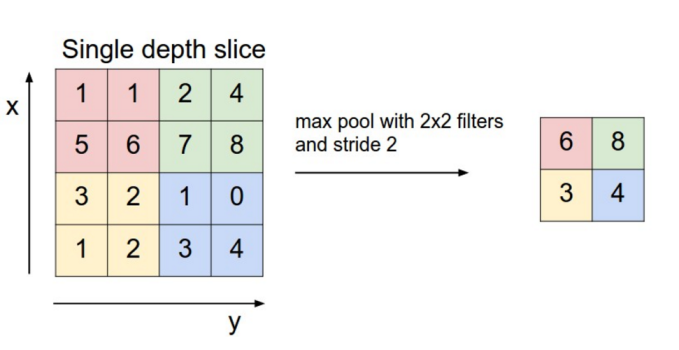

* **Сглаживание**: Результирующие карты признаков преобразуются в одномерный вектор после слоев свертки и объединения, чтобы их можно было передать в полностью связанный слой для категоризации или регрессии.

* **Fully Connected Layers**: Он берет входные данные из предыдущего слоя и вычисляет окончательную задачу классификации или регрессии.

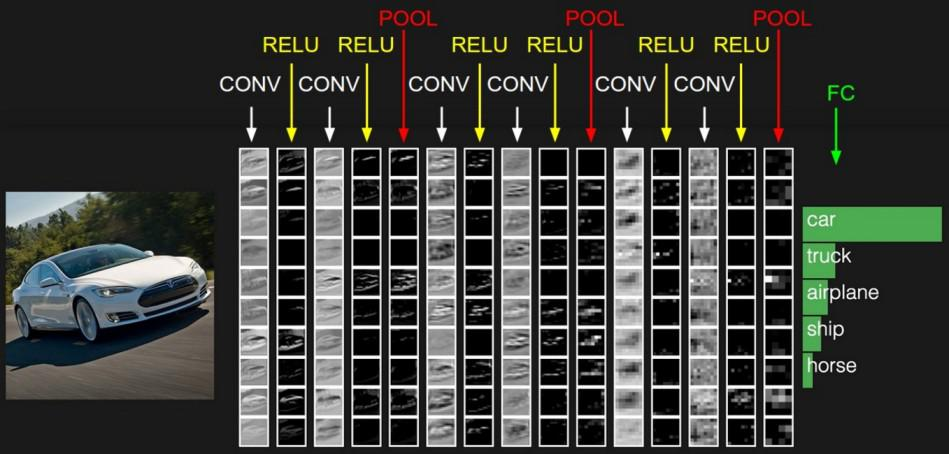

### **Пример: Применение CNN к изображению**
Давайте рассмотрим изображение и применим операции слоя свертки, слоя активации и слоя пула для извлечения внутреннего признака.

Входное изображение:

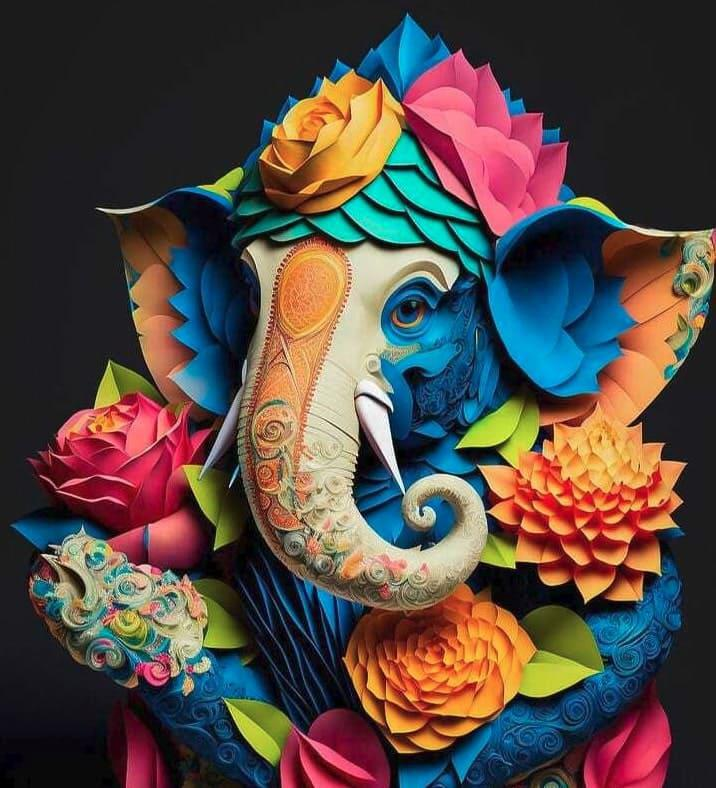

Шаги:
* Импортируйте необходимые библиотеки

* Устанавливаем параметры

* Определение ядра

* Загрузите изображение и постройте его.

* Примените операцию слоя свертки и постройте выходное изображение.

* Примените операцию с активационным слоем и постройте выходное изображение.

* Примените операцию объединения слоев и постройте на график выходное изображение.

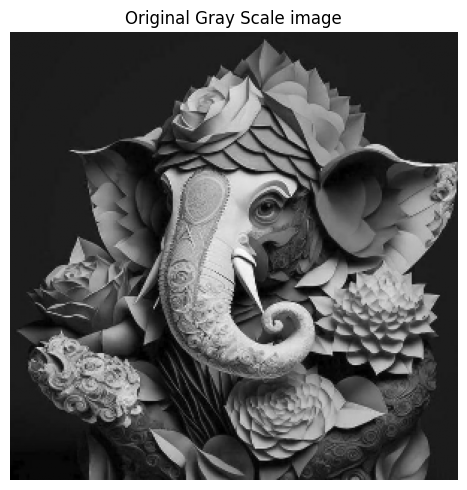

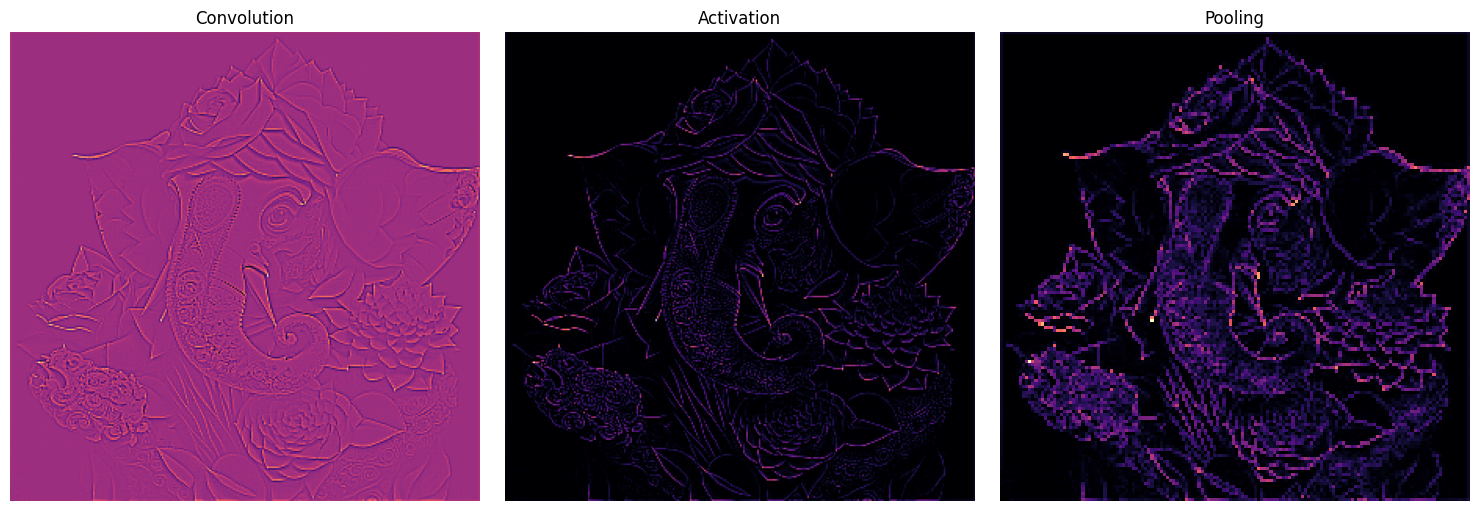

In [26]:
# import the necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

# set the param
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# define the kernel
kernel = tf.constant([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1],
                   ])

# load the image
image = tf.io.read_file('Ganesh.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

# plot the image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show();


# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# convolution layer
conv_fn = tf.nn.conv2d

image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1, # or (1, 1)
    padding='SAME',
)

plt.figure(figsize=(15, 5))

# Plot the convolved image
plt.subplot(1, 3, 1)

plt.imshow(
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.title('Convolution')

# activation layer
relu_fn = tf.nn.relu
# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)

plt.axis('off')
plt.title('Activation')

# Pooling layer
pool = tf.nn.pool
image_condense = pool(input=image_detect,
                             window_shape=(2, 2),
                             pooling_type='MAX',
                             strides=(2, 2),
                             padding='SAME',
                            )

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()


**Преимущества СНС**
- Хорошо обнаруживает шаблоны и особенности на изображениях, видео и аудиосигналах.
- Устойчив к инвариантности перемещения, вращения и масштабирования.
- Сквозное обучение, нет необходимости в ручном извлечении признаков.
- Может обрабатывать большие объемы данных и достигать высокой точности.

**Недостатки СНС**
- Требует больших вычислительных ресурсов для обучения и памяти.
- Может быть подвержен переобучению, если используется недостаточно данных или используется надлежащая регуляризация.
- Требуются большие объемы помеченных данных.
- Интерпретируемость ограничена, трудно понять, чему научилась сеть.